In [1]:
import os
import pandas as pd
import cv2
import json
import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import tqdm
from sklearn.model_selection import train_test_split
pd.set_option('display.max_colwidth', None)

In [2]:
IMAGES_DIR = '/home/ubuntu/storage/Doc2Answer/download_from_drive/data/ProcessedCards/ProcessedInnerCards/'
ANNOTATIONS_DIR = '/home/ubuntu/storage/Doc2Answer/download_from_drive/data/ProcessedCards/ProcessedInnerBoxes/'
# SAMPLES_FILE = 'sample-frames-to-annotate/samples.pkl'

In [8]:
dataset = json.load(open('../annotated_matched_boxes.json'))

In [9]:
dataset['100849_10b']['shapes'][0]['points']

[[301.4285714285714, 1009.9999999999999],
 [481.4285714285714, 1020.7142857142857],
 [469.99999999999994, 1212.8571428571427],
 [285.0, 1195.7142857142856]]

In [14]:
# ann_dict = {'name':[], 'path':[], 'points':[], 'box_id':[]}
# for k, v in dataset.items():
#     for shape in v['retrieved_boxes']:
#         ann_dict['name'].append(k)
#         ann_dict['path'].append(v['img_path'])
#         ann_dict['points'].append(tuple(np.round(shape['box']).astype(int)))
#         ann_dict['box_id'].append(shape['box_id'])

# ann_df = pd.DataFrame(ann_dict)
# ann_df.head(3)

ann_dict = {'name':[], 'path':[], 'points':[], 'box_id':[]}
for k, v in dataset.items():
    for shape in v['shapes']:
        ann_dict['name'].append(k)
        ann_dict['path'].append(v['img_path'])
        box = shape['points']
        xs, ys = [p[0] for p in box], [p[1] for p in box]
        x1, y1, x2, y2 = min(xs), min(ys), max(xs), max(ys)
        ann_dict['points'].append(tuple(np.round([x1,y1,x2,y2]).astype(int)))
        ann_dict['box_id'].append(int(shape['label'].split(' ')[-1]))

ann_df = pd.DataFrame(ann_dict)
ann_df.head(3)

,name,path,points,box_id
0,100849_10b,/home/ubuntu/storage/Doc2Answer/download_from_drive/data/ProcessedCards/ProcessedInnerCards/100849_10b.jpg,"(285, 1010, 481, 1213)",1
1,100849_10b,/home/ubuntu/storage/Doc2Answer/download_from_drive/data/ProcessedCards/ProcessedInnerCards/100849_10b.jpg,"(881, 300, 1074, 483)",2
2,100849_7b,/home/ubuntu/storage/Doc2Answer/download_from_drive/data/ProcessedCards/ProcessedInnerCards/100849_7b.jpg,"(935, 487, 1123, 677)",1


In [15]:
ann_df.to_pickle('ann_df.pkl')

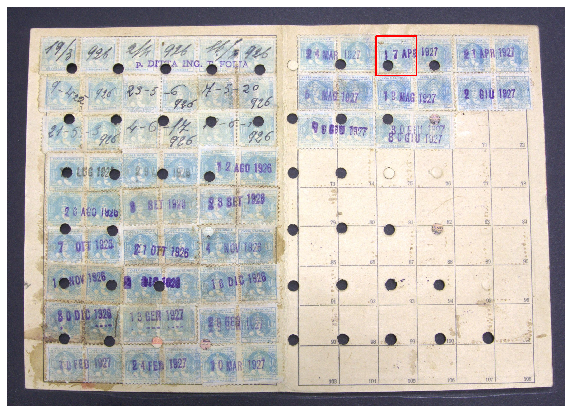

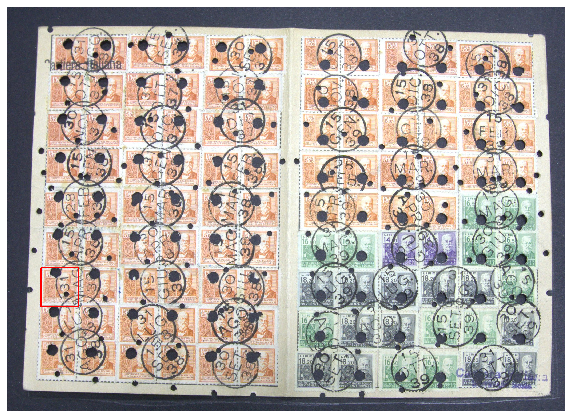

In [5]:
N_SAMPLES = 2
for _, row in ann_df.sample(N_SAMPLES).iterrows():
    
    img_path = row['path']
    x1, y1, x2, y2 = row['points']
    
    im = cv2.imread(img_path)
    cv2.rectangle(im, (x1, y1), (x2, y2), (0,0,255), 5)
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()    

In [6]:
ann_df.name.nunique(), ann_df.groupby('name').size().mean()

(811, 44.24537607891492)

In [23]:
from sklearn.model_selection import train_test_split

TEST_RATIO = 0.15
np.random.seed(314)
cards = sorted(ann_df.name.unique())
train_cards, test_cards = train_test_split(cards, test_size=TEST_RATIO, random_state=314)

In [24]:
train_df = ann_df[ann_df['name'].isin(train_cards)]
test_df  = ann_df[ann_df['name'].isin(test_cards)]

train_df = train_df.reset_index().drop('index', axis=1)
test_df = test_df.reset_index().drop('index', axis=1)

display(train_df)
display(test_df)


train_df.to_pickle('train_df.pkl')
test_df.to_pickle('test_df.pkl')

,name,path,points,box_id
0,100849_10b,/home/ubuntu/storage/Doc2Answer/download_from_drive/data/ProcessedCards/ProcessedInnerCards/100849_10b.jpg,"(285, 1010, 481, 1213)",1
1,100849_10b,/home/ubuntu/storage/Doc2Answer/download_from_drive/data/ProcessedCards/ProcessedInnerCards/100849_10b.jpg,"(881, 300, 1074, 483)",2
2,100849_10b,/home/ubuntu/storage/Doc2Answer/download_from_drive/data/ProcessedCards/ProcessedInnerCards/100849_10b.jpg,"(103, 998, 299, 1201)",1
3,100849_10b,/home/ubuntu/storage/Doc2Answer/download_from_drive/data/ProcessedCards/ProcessedInnerCards/100849_10b.jpg,"(1066, 299, 1259, 482)",2
4,100849_10b,/home/ubuntu/storage/Doc2Answer/download_from_drive/data/ProcessedCards/ProcessedInnerCards/100849_10b.jpg,"(870, 484, 1063, 667)",2
...,...,...,...,...
30994,Image 6,/home/ubuntu/storage/Doc2Answer/download_from_drive/data/ProcessedCards/ProcessedInnerCards/1424_6b.jpg,"(149, 502, 336, 687)",1
30995,Image 6,/home/ubuntu/storage/Doc2Answer/download_from_drive/data/ProcessedCards/ProcessedInnerCards/1424_6b.jpg,"(333, 499, 520, 684)",1
30996,Image 6,/home/ubuntu/storage/Doc2Answer/download_from_drive/data/ProcessedCards/ProcessedInnerCards/1424_6b.jpg,"(156, 321, 343, 506)",1
30997,Image 6,/home/ubuntu/storage/Doc2Answer/download_from_drive/data/ProcessedCards/ProcessedInnerCards/1424_6b.jpg,"(902, 312, 1089, 497)",1


,name,path,points,box_id
0,10231_9b,/home/ubuntu/storage/Doc2Answer/download_from_drive/data/ProcessedCards/ProcessedInnerCards/10231_9b.jpg,"(372, 164, 558, 344)",1
1,10231_9b,/home/ubuntu/storage/Doc2Answer/download_from_drive/data/ProcessedCards/ProcessedInnerCards/10231_9b.jpg,"(544, 512, 726, 702)",2
2,10231_9b,/home/ubuntu/storage/Doc2Answer/download_from_drive/data/ProcessedCards/ProcessedInnerCards/10231_9b.jpg,"(536, 872, 726, 1068)",3
3,10231_9b,/home/ubuntu/storage/Doc2Answer/download_from_drive/data/ProcessedCards/ProcessedInnerCards/10231_9b.jpg,"(194, 168, 380, 349)",1
4,10231_9b,/home/ubuntu/storage/Doc2Answer/download_from_drive/data/ProcessedCards/ProcessedInnerCards/10231_9b.jpg,"(359, 690, 545, 871)",1
...,...,...,...,...
4879,Image 3,/home/ubuntu/storage/Doc2Answer/download_from_drive/data/ProcessedCards/ProcessedInnerCards/1424_3b.jpg,"(405, 692, 623, 939)",2
4880,Image 3,/home/ubuntu/storage/Doc2Answer/download_from_drive/data/ProcessedCards/ProcessedInnerCards/1424_3b.jpg,"(828, 691, 1046, 938)",2
4881,Image 3,/home/ubuntu/storage/Doc2Answer/download_from_drive/data/ProcessedCards/ProcessedInnerCards/1424_3b.jpg,"(1071, 196, 1289, 443)",2
4882,Image 3,/home/ubuntu/storage/Doc2Answer/download_from_drive/data/ProcessedCards/ProcessedInnerCards/1424_3b.jpg,"(198, 694, 416, 941)",2


In [4]:
ann_df = pd.read_pickle('train_df.pkl')

In [32]:
img_path = '/home/ubuntu/storage/Doc2Answer/download_from_drive/data/ProcessedCards/ProcessedInnerCards/100849_10b.jpg'
boxes = ann_df.loc[ann_df.path==img_path, 'points'].apply(np.array).values
boxes = np.stack(boxes)

In [37]:
ann_df.name.nunique(), ann_df.path.apply(lambda x: x.split('/')[-1]).nunique()

(689, 682)

In [47]:
sorted(ann_df.groupby('path').name.unique(), key=lambda x: len(x), reverse=1)

[array(['10231_2b', 'Image 14'], dtype=object),
 array(['10231_3b', 'Image 15'], dtype=object),
 array(['10231_5b', 'Image 17'], dtype=object),
 array(['10231_6b', 'Image 18'], dtype=object),
 array(['10423_2b', 'Image 23'], dtype=object),
 array(['10423_3b', 'Image 24'], dtype=object),
 array(['10423_7b', 'Image 28'], dtype=object),
 array(['100849_10b'], dtype=object),
 array(['100849_7b'], dtype=object),
 array(['100849_8b'], dtype=object),
 array(['100849_9b'], dtype=object),
 array(['101342_3b'], dtype=object),
 array(['101342_4b'], dtype=object),
 array(['101342_5b'], dtype=object),
 array(['101342_6b'], dtype=object),
 array(['10231_1b'], dtype=object),
 array(['10231_4b'], dtype=object),
 array(['10231_7b'], dtype=object),
 array(['10231_8b'], dtype=object),
 array(['Image 21'], dtype=object),
 array(['103445_10b'], dtype=object),
 array(['103445_11b'], dtype=object),
 array(['103445_12b'], dtype=object),
 array(['103445_13b'], dtype=object),
 array(['103445_14b'], dtype=object